In [5]:
using CSV, DataFrames
using FileIO, Dates
using Graphs, MetaGraphs
using DataStructures
using PyCall
using Plots

include("./src/cubes.jl")
include("./src/network.jl")

@pyimport powerlaw as powlaw

In [6]:
region="romania"

# Read data
path = "./data/"
filepath = path * region * ".csv"
df = CSV.read(filepath, DataFrame);

# Make path for results
mkpath("./results/$region")

"./results/romania"

In [7]:
# # Based on parameter dependency, extract which side lengths are the best:
# if region == "romania"
#     sides = [3, 4, 5];
#     # minimum_magnitudes = [0,1,2,3];
# elseif region == "california"
#     sides = [1, 1.5, 2];
#     # minimum_magnitudes = [2,3];
# elseif region == "italy"
#     sides = [5, 7.5, 10];
#     # minimum_magnitudes = [2,3];
# elseif region == "japan"
#     sides = [3, 4, 5];
#     # minimum_magnitudes = [2,3,4];
# end;
side = 5;

Calculating best minimal value for power law fit


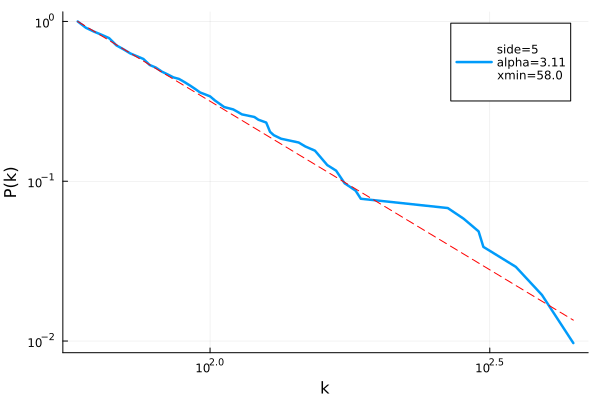

In [175]:
df, df_cubes = region_cube_split(df,side=side)
MG = create_network(df, df_cubes)
degrees=[]
for i in 1:nv(MG)
    push!(degrees, get_prop(MG, i, :degree))
end

Plots.plot(xlabel = "k", ylabel = "P(k)")

# Powerlaw Fit
fit = powlaw.Fit(degrees);
alpha = round(fit.alpha,digits=4)
xmin = fit.xmin

# CCDF of data truncated
x_ccdf, y_ccdf = fit.ccdf()
Plots.plot!(x_ccdf, y_ccdf, xscale=:log10, yscale=:log10, label="side=$side\nalpha=$alpha\nxmin=$xmin", linewidth=2.5)

# Theoretical power_law
fit_degrees_power_law = fit.power_law.plot_ccdf()[:lines][1]
x_powlaw, y_powlaw = fit_degrees_power_law[:get_xdata](), fit_degrees_power_law[:get_ydata]()
Plots.plot!(x_powlaw, y_powlaw, xscale=:log10, yscale=:log10, label="", color=:red, linestyle=:dash) 

In [112]:
fit.alpha

3.1100005443700645

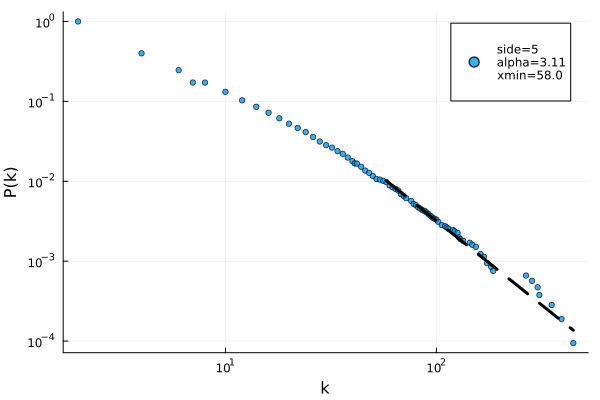

In [176]:
Plots.plot(xlabel = "k", ylabel = "P(k)")

x_ccdf_original_data, y_ccdf_original_data = powlaw.ccdf(degrees)
Plots.scatter!(x_ccdf_original_data, y_ccdf_original_data, xscale=:log10, yscale=:log10, label="side=$side\nalpha=$alpha\nxmin=$xmin", markersize=3, alpha=0.8)

# Theoretical power_law over all data
fit_degrees_power_law = fit.power_law.plot_pdf()[:lines][1]
x_powlaw, y_powlaw = fit_degrees_power_law[:get_xdata](), fit_degrees_power_law[:get_ydata]()
Plots.plot!(x_powlaw, y_ccdf_original_data[end-length(x_ccdf)] .* y_powlaw, xscale=:log10, yscale=:log10, label="", color=:black, linestyle=:dash, linewidth=3) 

In [100]:
y_powlaw

47-element Vector{Float64}:
 1.0
 0.9309662138916651
 0.8687335335263986
 0.8124437424607203
 0.7613692486434545
 0.7148900014432277
 0.6724750215710626
 0.6336675212209202
 0.5653486022935402
 0.5351966479607267
 ⋮
 0.08955341823122798
 0.08553827318253238
 0.040209850004590764
 0.03502119760321276
 0.03076224500008229
 0.029511457573105804
 0.02226525227162235
 0.01774185449821053
 0.013512510121677312

In [99]:
x_powlaw

47-element Vector{Float64}:
  58.0
  60.0
  62.0
  64.0
  66.0
  68.0
  70.0
  72.0
  76.0
  78.0
   ⋮
 182.0
 186.0
 266.0
 284.0
 302.0
 308.0
 352.0
 392.0
 446.0

In [34]:
fit_degrees_power_law = fit.power_law.pdf()

103-element Vector{Float64}:
 0.036379319730518354
 0.036379319730518354
 0.036379319730518354
 0.036379319730518354
 0.036379319730518354
 0.036379319730518354
 0.036379319730518354
 0.036379319730518354
 0.036379319730518354
 0.032738986968359196
 ⋮
 0.0010382294572422587
 0.0009703537794603145
 0.0003189579150328012
 0.0002601927676312345
 0.00021492832349741394
 0.00020217269981950392
 0.0001334650409478976
 9.549827206469055e-5
 6.392691415368878e-5

In [18]:
for i in eachindex(x_ccdf_original_data)
    if x_ccdf_original_data[i] == x_ccdf[1]
        x_test = x_ccdf_original_data[i:end]
        y_test = y_ccdf_original_data[i:end]
        break
    end
end

In [72]:
y_ccdf

47-element Vector{Float64}:
 1.0
 0.912621359223301
 0.8640776699029127
 0.8252427184466019
 0.7864077669902912
 0.7087378640776699
 0.6699029126213591
 0.6310679611650485
 0.5825242718446602
 0.5339805825242718
 ⋮
 0.08737864077669899
 0.07766990291262132
 0.06796116504854366
 0.058252427184465994
 0.04854368932038833
 0.03883495145631066
 0.029126213592232997
 0.01941747572815533
 0.009708737864077666

In [76]:
(x_ccdf[1]/xmin) .^ -(alpha+1)

1.0

In [141]:
y_powlaw_test = y_powlaw .* ((x_powlaw/xmin) .^ -(fit.alpha+1));

In [151]:
y_powlaw_test = 0.01 .* y_powlaw

47-element Vector{Float64}:
 0.01
 0.00930966213891665
 0.008687335335263986
 0.008124437424607204
 0.007613692486434545
 0.007148900014432277
 0.006724750215710626
 0.0063366752122092015
 0.005653486022935402
 0.005351966479607268
 ⋮
 0.0008955341823122798
 0.0008553827318253238
 0.00040209850004590766
 0.00035021197603212764
 0.0003076224500008229
 0.00029511457573105806
 0.0002226525227162235
 0.0001774185449821053
 0.00013512510121677313

In [155]:
y_ccdf_original_data[31]

0.009730751062824727

In [153]:
y_ccdf_original_data[31:end] ./ y_powlaw

47-element Vector{Float64}:
 0.009730751062824727
 0.009539004884072099
 0.009678600376619885
 0.009884046168280904
 0.010050758193988983
 0.009647011022975719
 0.009693532502888439
 0.009690831592551442
 0.010026377803673301
 0.009708641002749846
 ⋮
 0.00949444274042832
 0.008835652886091089
 0.01644654677775357
 0.016185622038388303
 0.015355399335988482
 0.012804967163079887
 0.01272924871504545
 0.010649767339605026
 0.006991544164542428

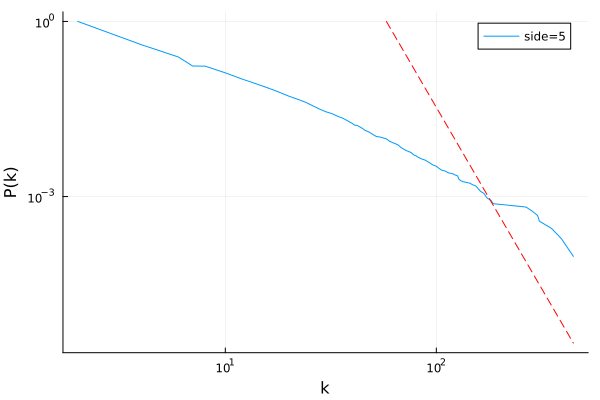

In [143]:
Plots.plot(xlabel = "k", ylabel = "P(k)")

x_ccdf_original_data, y_ccdf_original_data = powlaw.ccdf(degrees)
Plots.plot!(x_ccdf_original_data, y_ccdf_original_data, xscale=:log10, yscale=:log10, label="side=$side")

# # Theoretical power_law
# fit_degrees_power_law = fit.power_law.plot_ccdf()[:lines][1]
# x_powlaw, y_powlaw = fit_degrees_power_law[:get_xdata](), fit_degrees_power_law[:get_ydata]()
Plots.plot!(x_ccdf_original_data[31:end], y_powlaw_test, xscale=:log10, yscale=:log10, label="", color=:red, linestyle=:dash)

In [61]:
x_ccdf

47-element Vector{Float64}:
  58.0
  60.0
  62.0
  64.0
  66.0
  68.0
  70.0
  72.0
  76.0
  78.0
   ⋮
 182.0
 186.0
 266.0
 284.0
 302.0
 308.0
 352.0
 392.0
 446.0

In [60]:
y_powlaw_test

77-element Vector{Float64}:
     1.0243674532156015e6
 59322.91582116373
 11206.949487547421
  5947.522710877406
  3435.494099776109
  1373.0585396140652
   649.0141003356158
   344.4314713575539
   198.9554887217094
   122.6080703971809
     ⋮
     0.009094852266314584
     0.00831746252522361
     0.0019117254729648671
     0.0014606651782191704
     0.001134646343691251
     0.001046515364200618
     0.0006045033426204226
     0.0003884036639320092
     0.0002285192469481636